In [1]:
#importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame({
     "Potencia":[120,80,100,110,90,130,70,105,115,85],
     "Eficiencia":[92,65,75,85,68,95,60,80,88,70],
     "Idade":[3,8,5,4,7,2,10,6,3,9],
     "Tamanho":[50,45,55,60,48,62,40,58,56,47],
     "Consumo":["Eficiente","Ineficiente","Ineficiente","Eficiente","Ineficiente","Eficiente","Ineficiente","Eficiente","Eficiente","Ineficiente"] 
})

In [3]:
#Separando a base de dados em treino e teste
X = data[['Potencia','Eficiencia','Idade','Tamanho']]
y = data['Consumo'] 

In [4]:
# Dividindo a base de dados em treino e teste
X_train,X_teste,y_train,y_test= train_test_split(X,y,test_size=0.3,
                                                 random_state=42)

In [5]:
# Criação do modelo de Machine Learning
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Fazendo predições
yprev = modelo.predict(X_teste)

In [7]:
yprev

array(['Eficiente', 'Ineficiente', 'Eficiente'], dtype=object)

In [8]:
X_teste

,Potencia,Eficiencia,Idade,Tamanho
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [9]:
data.head(10)

,Potencia,Eficiencia,Idade,Tamanho,Consumo
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [10]:
# Calculo das métricas do algoritmo de machine learning
# Acurácia - 
acuracy = accuracy_score(yprev,y_test)
print(acuracy)

1.0


In [11]:
classi_re = classification_report(yprev,y_test)
print(classi_re)

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [12]:
cm = confusion_matrix(yprev,y_test)

Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

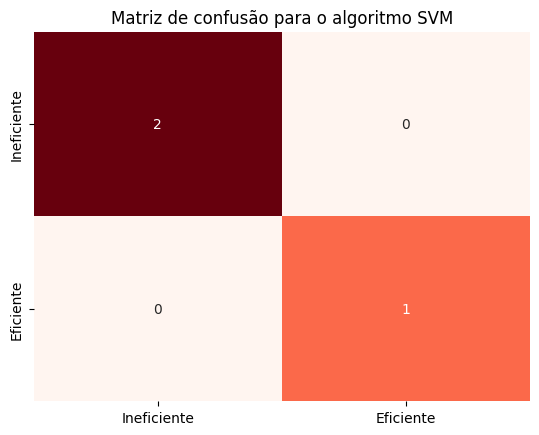

In [13]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Ineficiente', 'Eficiente'], 
            yticklabels=['Ineficiente', 'Eficiente'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM')  

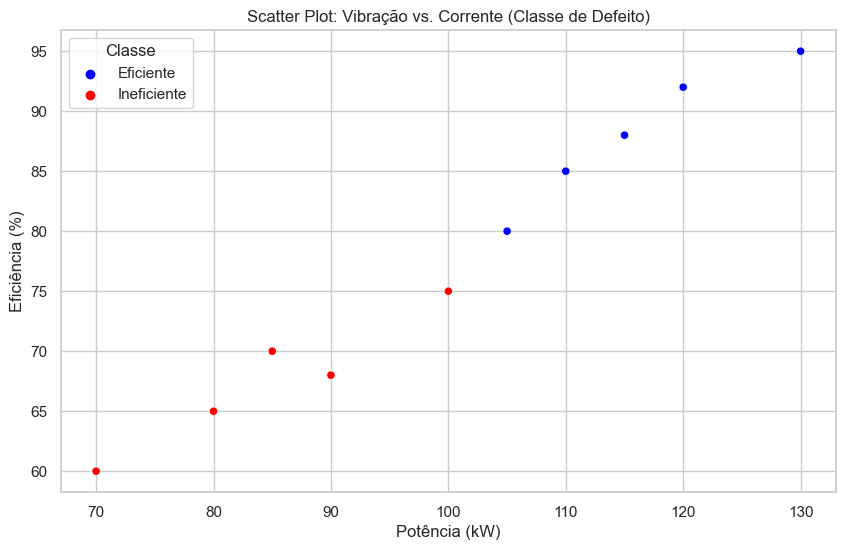

In [19]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Ineficiente": "red", "Eficiente": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potencia', y='Eficiencia', hue='Consumo', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potência vs Eficiência (Consumo Eficiente)')
plt.xlabel('Potência (kW)')
plt.ylabel('Eficiência (%)')

# Mostrando o gráfico
plt.legend(title='Classe')
plt.show()